In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Testing out the basic bechdel data

df = pd.read_csv("bechdel_data_min.csv")
df.head()

,year,imdb,title,clean_test,binary,genre,age_rating,budget_2013$,star_rating,creator,director,cast,writer
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,comedy,R,13000000,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,scifi,R,45658735,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,drama,R,20000000,NaN,NaN,NaN,NaN,NaN
3,2013,tt1272878,2 Guns,notalk,FAIL,action,R,61000000,NaN,NaN,NaN,NaN,NaN
4,2013,tt0453562,42,men,FAIL,drama,PG13,40000000,NaN,NaN,NaN,NaN,NaN


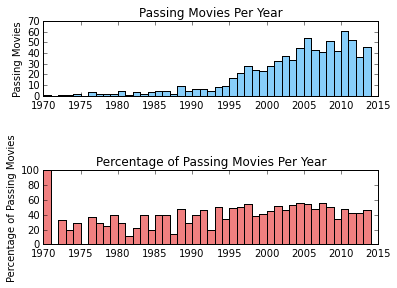

In [100]:
# making a chart of number of passing movies per year

passed_per_year = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    passed_per_year.append([i, (passed)])
    
df_ppy = pd.DataFrame(passed_per_year, columns = ['year', 'passing'])

# making a chart of percentage of passing movies per year

passed_vs_total = []

for i in xrange(1970, 2014):
    passed = len(df[(df.binary == "PASS") & (df.year == i)])
    total = len(df[df.year == i])
    passed_vs_total.append([i, (passed/float(total))*100])
    
df_pvt = pd.DataFrame(passed_vs_total, columns = ['year', 'p_passing'])

plt.subplot(2, 1, 1)
plt.bar(df_ppy.year, df_ppy.passing,1, color='lightskyblue')
plt.ylabel('Passing Movies')
plt.title('Passing Movies Per Year')

plt.subplot(2, 1, 2)
plt.bar(df_pvt.year, df_pvt.p_passing,1, color='lightcoral')
plt.ylabel('Percentage of Passing Movies')
plt.title('Percentage of Passing Movies Per Year')
plt.subplots_adjust(hspace=1)

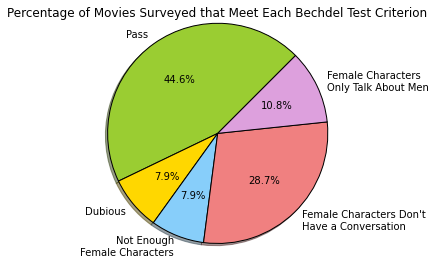

In [129]:
# percent of total movies surveyed that totally pass, fail different parts

length = len(df)
categories = ["ok", "dubious", "nowomen", "notalk", "men"]
criterion_ps = []
for category in categories:
    criterion_ps.append((len(df[df.clean_test == category]))/float(length))


cats = ["Pass", "Dubious", "Not Enough \nFemale Characters", "Female Characters Don't \nHave a Conversation", "Female Characters \nOnly Talk About Men"]
plt.pie(criterion_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=45, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Percentage of Movies Surveyed that Meet Each Bechdel Test Criterion')


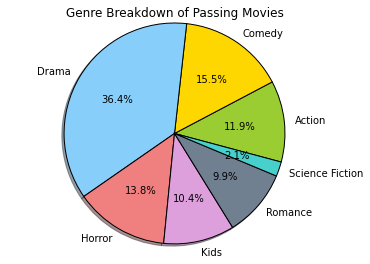

In [130]:
# of movies that passed, what percents of each genre

passed_total = len(df[df.binary == "PASS"])
genres = ["action","comedy","drama","horror","kids","romance","scifi"]
genre_ps = []
for genre in genres:
    genre_ps.append((len(df[(df.binary == "PASS") & (df.genre == genre )]))/float(passed_total))

cats = ["Action","Comedy","Drama","Horror","Kids","Romance","Science Fiction"]
plt.pie(genre_ps, explode=None, labels = cats,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum', 'slategray','mediumturquoise'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=-15, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Genre Breakdown of Passing Movies')

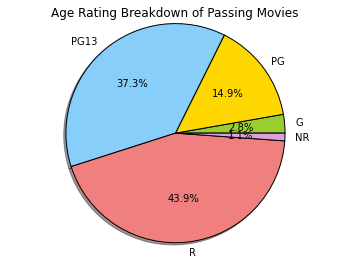

In [125]:
# of movies that passed, what age rating of each movie

ratings = ["G","PG","PG13","R","NR"]
rating_ps = []
for rating in ratings:
    rating_ps.append((len(df[(df.binary == "PASS") & (df.age_rating == rating )]))/float(passed_total))

plt.pie(rating_ps, explode=None, labels = ratings,
    colors=('yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'plum'),
    autopct='%1.1f%%', pctdistance=0.6, shadow=True,
    labeldistance=1.1, startangle=None, radius=None,
    counterclock=True, wedgeprops=None, textprops=None)
plt.axis('equal')
plt.title('Age Rating Breakdown of Passing Movies')